# Linear Regression

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Model Diagnostics
8. Predictions and Evaluations

## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
#import random

## 2. Load Data

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

## 3. Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()  

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# Remove the extra space from column names

df = df.rename(columns=lambda x: x.strip())

In [7]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


## 4. Data Pre-processing

In [8]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 

# Encode labels in column 'Status'. 
df['Status']= label_encoder.fit_transform(df['Status'])
  
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
#Function to check skewness of data
def check_skewness(df):
    highly_skewd=[]
    moderate_skewd=[]
    for i,j in df.skew().items():
        if (j < -1) or (j > 1):
            highly_skewd.append(i)
            df[i].fillna(df[i].median(), inplace=True)
        elif (-1 > j > -0.5) or (0.5 < j <1):
            moderate_skewd.append(i)
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            pass
    return highly_skewd,moderate_skewd, df.isnull().sum()
check_skewness(df)

(['Status',
  'Adult Mortality',
  'infant deaths',
  'percentage expenditure',
  'Hepatitis B',
  'Measles',
  'under-five deaths',
  'Polio',
  'Diphtheria',
  'HIV/AIDS',
  'GDP',
  'Population',
  'thinness  1-19 years',
  'thinness 5-9 years',
  'Income composition of resources'],
 ['Alcohol', 'Total expenditure'],
 Country                              0
 Year                                 0
 Status                               0
 Life expectancy                     10
 Adult Mortality                      0
 infant deaths                        0
 Alcohol                              0
 percentage expenditure               0
 Hepatitis B                          0
 Measles                              0
 BMI                                 34
 under-five deaths                    0
 Polio                                0
 Total expenditure                    0
 Diphtheria                           0
 HIV/AIDS                             0
 GDP                                  

In [10]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [11]:
print(df.isna().sum())
print(df.shape)

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                          0
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources     0
Schooling                           0
dtype: int64
(2938, 22)


In [12]:
df = df.dropna()

## 5. Exploratory Data Analysis

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


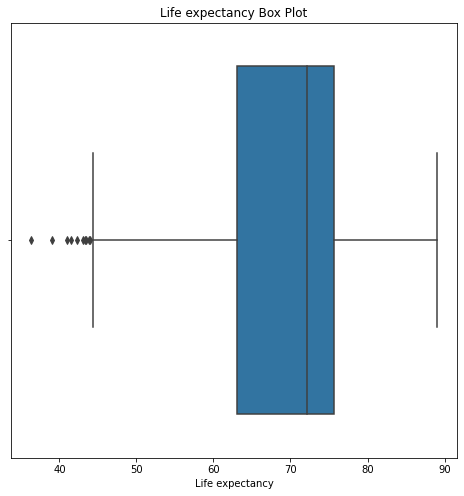

In [13]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8))
sns.boxplot(df['Life expectancy'])
plt.title('Life expectancy Box Plot')
plt.show()

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Life expectancy Distribution Plot'}, xlabel='Life expectancy', ylabel='Density'>

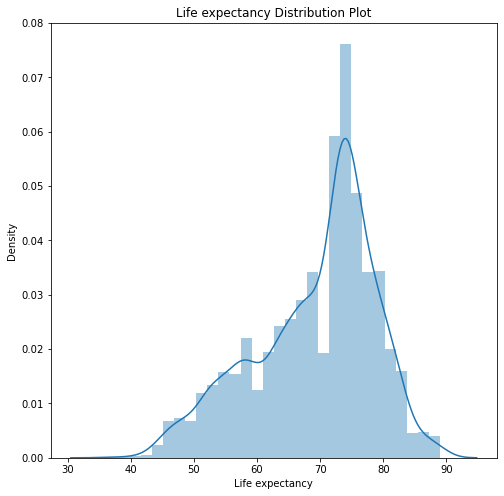

In [14]:
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df['Life expectancy'])

#### Summary : 

The y variable is having very few outliers and is almost linearly distributed. So the assumption for linear regression holds true

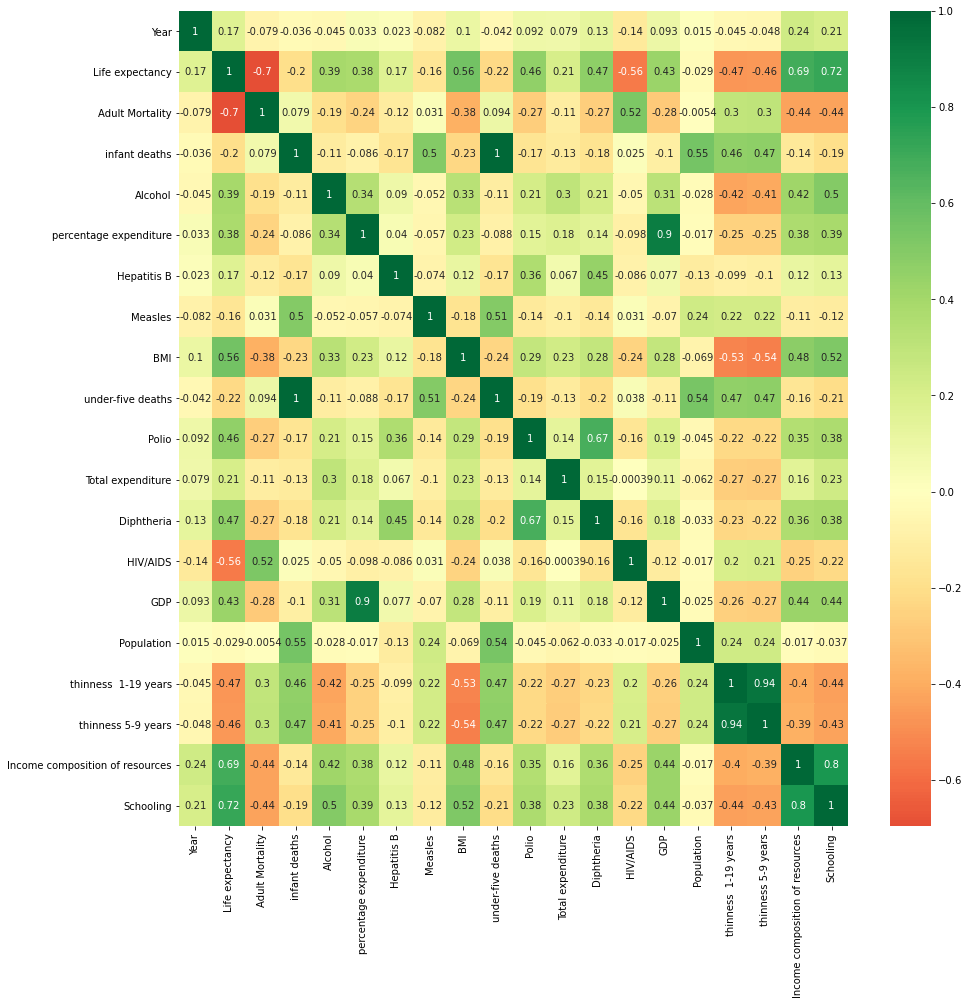

In [15]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

In [16]:
df.corr()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000e+00,-5.534143e-15,0.170033,-0.079052,-0.036464,-0.044968,0.032723,0.022671,-0.081840,0.104094,...,0.091727,0.079003,0.131852,-0.138789,0.093170,0.014749,-0.044805,-0.047856,0.235866,0.207357
Status,-5.534143e-15,1.000000e+00,-0.482136,0.315284,0.112708,-0.579454,-0.454032,-0.127101,0.077320,-0.314701,...,-0.219221,-0.293817,-0.215868,0.149178,-0.445684,0.037886,0.367643,0.365996,-0.461478,-0.493162
Life expectancy,1.700330e-01,-4.821361e-01,1.000000,-0.696359,-0.196557,0.392403,0.381864,0.171255,-0.157586,0.562397,...,0.459458,0.209628,0.473268,-0.556556,0.430992,-0.028846,-0.467859,-0.462316,0.688591,0.718640
Adult Mortality,-7.905159e-02,3.152844e-01,-0.696359,1.000000,0.078756,-0.190799,-0.242860,-0.123971,0.031176,-0.383592,...,-0.270597,-0.111753,-0.270877,0.523821,-0.281715,-0.005389,0.296076,0.301578,-0.436268,-0.437283
infant deaths,-3.646405e-02,1.127082e-01,-0.196557,0.078756,1.000000,-0.114796,-0.085906,-0.168393,0.501038,-0.227420,...,-0.171273,-0.126781,-0.175747,0.024955,-0.103176,0.551608,0.464762,0.470397,-0.141329,-0.193250
Alcohol,-4.496822e-02,-5.794540e-01,0.392403,-0.190799,-0.114796,1.000000,0.339529,0.089916,-0.051769,0.325881,...,0.212675,0.300875,0.214188,-0.049686,0.312276,-0.027879,-0.418850,-0.407729,0.421515,0.498127
percentage expenditure,3.272257e-02,-4.540322e-01,0.381864,-0.242860,-0.085906,0.339529,1.000000,0.039805,-0.056831,0.230959,...,0.146546,0.175126,0.142897,-0.098230,0.901802,-0.017067,-0.250729,-0.252261,0.375234,0.389941
Hepatitis B,2.267079e-02,-1.271006e-01,0.171255,-0.123971,-0.168393,0.089916,0.039805,1.000000,-0.073544,0.116749,...,0.362537,0.067104,0.447373,-0.086197,0.076937,-0.125716,-0.099491,-0.102500,0.118166,0.134014
Measles,-8.184033e-02,7.731993e-02,-0.157586,0.031176,0.501038,-0.051769,-0.056831,-0.073544,1.000000,-0.176022,...,-0.136966,-0.104748,-0.142680,0.030673,-0.069531,0.237096,0.224606,0.220866,-0.110884,-0.123651
BMI,1.040940e-01,-3.147011e-01,0.562397,-0.383592,-0.227420,0.325881,0.230959,0.116749,-0.176022,1.000000,...,0.285286,0.228141,0.284116,-0.243573,0.278325,-0.069356,-0.530465,-0.537439,0.478397,0.519133


In [17]:
# Pair Plots to know the relation between different features
#ax = sns.pairplot(df[num_col])

Few of the features are having the linear relationship with y variable. So linear regression would be good approach for the same

## 6. Model Building

In [18]:
# Train test split
X=df.drop(columns=['Life expectancy','Country'])
y=df[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3
                                                    ,random_state=1234)

## Approach 1 : Adding 1 varaible after 1

### Building model with 1 variable

In [19]:
# Select only one feature in regression model
X_train1 = X_train['Income composition of resources']

In [20]:
#sns.distplot(df['Income composition of resources'])

In [21]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train, X_train1).fit()

In [22]:
# Check parameters created
model_1.params

const                              49.180002
Income composition of resources    31.851079
dtype: float64

In [23]:
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1849.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          2.13e-288
Time:                        12:59:14   Log-Likelihood:                -6865.3
No. Observations:                2049   AIC:                         1.373e+04
Df Residuals:                    2047   BIC:                         1.375e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared is very less for the model, so there's a need to add more features as R-square itself is not able to explain the expenses

Durbin-Watson: Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 means negative autocorrelation.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test statistic is always nonnegative. ... If it is far from zero, it signals the data do not have a normal distribution.

The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed

### Building model with 2 variable

In [24]:
# Add one more feature in regression model
X_train2 = X_train[['Income composition of resources','Schooling']]

In [25]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train, X_train2).fit()

In [26]:
# Check parameters created
model_2.params

const                              43.619625
Income composition of resources    14.853262
Schooling                           1.356194
dtype: float64

In [27]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:14   Log-Likelihood:                -6699.4
No. Observations:                2049   AIC:                         1.340e+04
Df Residuals:                    2046   BIC:                         1.342e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared and Adj. R squared has increased for the model, but we can still improvise over it so let's add more features

### Building model with 3 variable

In [28]:
# Adding one more feature in regression model
X_train3 = X_train[['Income composition of resources','Schooling', 'Adult Mortality']]

In [29]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train, X_train3).fit()

In [30]:
# Check parameters created
model_3.params

const                              56.581901
Income composition of resources     9.932038
Schooling                           1.009310
Adult Mortality                    -0.034648
dtype: float64

In [31]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1682.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:15   Log-Likelihood:                -6251.0
No. Observations:                2049   AIC:                         1.251e+04
Df Residuals:                    2045   BIC:                         1.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We have achieved a R-squared of `0.72` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `Life expectancy`.

## Approach 2 : RFE and eleminating by using p-value and VIF

In [32]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train, y_train)

from sklearn.feature_selection import RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', False, 2),
 ('Status', True, 1),
 ('Adult Mortality', True, 1),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 3),
 ('Hepatitis B', True, 1),
 ('Measles', False, 5),
 ('BMI', True, 1),
 ('under-five deaths', True, 1),
 ('Polio', True, 1),
 ('Total expenditure', True, 1),
 ('Diphtheria', True, 1),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 4),
 ('Population', False, 6),
 ('thinness  1-19 years', True, 1),
 ('thinness 5-9 years', True, 1),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [34]:
# Selecting the important features (in the support)
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [35]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [36]:
#random.seed(0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

# Build the model with RFE features
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     610.7
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:16   Log-Likelihood:                -5777.1
No. Observations:                2049   AIC:                         1.159e+04
Df Residuals:                    2033   BIC:                         1.168e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,under-five deaths,188.82
2,infant deaths,188.05
14,Schooling,44.10
13,Income composition of resources,29.99
9,Diphtheria,28.83
7,Polio,26.91
11,thinness 1-19 years,19.95
12,thinness 5-9 years,19.82
4,Hepatitis B,17.44
5,BMI,7.98


Since the variable **thinness 5-9 years** is having a very high p value , we would remove the feature from training dataset

In [38]:
# Dropping insignificant variables

X_train_rfe1 = X_train_rfe.drop(['thinness 5-9 years'], 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     654.6
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:16   Log-Likelihood:                -5777.2
No. Observations:                2049   AIC:                         1.158e+04
Df Residuals:                    2034   BIC:                         1.167e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,under-five deaths,188.51
2,infant deaths,187.56
13,Schooling,44.06
12,Income composition of resources,29.99
9,Diphtheria,28.81
7,Polio,26.91
4,Hepatitis B,17.42
5,BMI,7.89
8,Total expenditure,7.61
0,Status,7.10


Since the variable `under-five deaths` is having a very high VIF score, we would remove the feature from training dataset

In [40]:
# Dropping insignificant variables

X_train_rfe2 = X_train_rfe1.drop('under-five deaths', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     665.7
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:16   Log-Likelihood:                -5825.3
No. Observations:                2049   AIC:                         1.168e+04
Df Residuals:                    2035   BIC:                         1.176e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Schooling,44.05
11,Income composition of resources,29.82
8,Diphtheria,28.26
6,Polio,26.83
4,Hepatitis B,16.99
5,BMI,7.89
7,Total expenditure,7.61
0,Status,7.07
3,Alcohol,4.30
1,Adult Mortality,4.12


Since the variable `Alcohol` is having a very high p value, we would remove the feature from training dataset

In [42]:
# Dropping insignificant variables

X_train_rfe3 = X_train_rfe2.drop('Alcohol', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     721.5
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:17   Log-Likelihood:                -5825.3
No. Observations:                2049   AIC:                         1.168e+04
Df Residuals:                    2036   BIC:                         1.175e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Schooling,41.45
10,Income composition of resources,29.81
7,Diphtheria,28.25
5,Polio,26.80
3,Hepatitis B,16.98
4,BMI,7.89
6,Total expenditure,7.40
0,Status,6.01
1,Adult Mortality,4.03
9,thinness 1-19 years,3.86


Since the variable **Schooling** is having a very high VIF score, we would remove the feature from training dataset

In [44]:
# Dropping insignificant variables

X_train_rfe4 = X_train_rfe3.drop('Schooling', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     699.2
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:17   Log-Likelihood:                -5922.9
No. Observations:                2049   AIC:                         1.187e+04
Df Residuals:                    2037   BIC:                         1.194e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Diphtheria,28.15
5,Polio,26.47
3,Hepatitis B,16.85
10,Income composition of resources,13.61
4,BMI,7.57
6,Total expenditure,7.08
0,Status,6.01
1,Adult Mortality,4.03
9,thinness 1-19 years,3.85
8,HIV/AIDS,1.54


Since the variable `Diphtheria` is having a very high VIF score, we would remove the feature from training dataset

In [46]:
# Dropping insignificant variables

X_train_rfe5 = X_train_rfe4.drop('Diphtheria', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     731.7
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:17   Log-Likelihood:                -5963.5
No. Observations:                2049   AIC:                         1.195e+04
Df Residuals:                    2038   BIC:                         1.201e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
5,Polio,18.00
3,Hepatitis B,15.25
9,Income composition of resources,13.17
4,BMI,7.56
6,Total expenditure,7.01
0,Status,5.99
1,Adult Mortality,4.03
8,thinness 1-19 years,3.85
7,HIV/AIDS,1.54
2,infant deaths,1.40


In [47]:
# Dropping insignificant variables

X_train_rfe6 = X_train_rfe5.drop('Polio', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     740.8
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:17   Log-Likelihood:                -6037.6
No. Observations:                2049   AIC:                         1.210e+04
Df Residuals:                    2039   BIC:                         1.215e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
3,Hepatitis B,12.02
8,Income composition of resources,11.45
4,BMI,7.45
5,Total expenditure,6.82
0,Status,5.90
1,Adult Mortality,4.03
7,thinness 1-19 years,3.83
6,HIV/AIDS,1.54
2,infant deaths,1.40


In [48]:
# Dropping insignificant variables

# X_train_rfe7 = X_train_rfe6.drop('Hepatitis B', 1,)

# Adding a constant variable and Build a second fitted model

# X_train_rfe7c = sm.add_constant(X_train_rfe7)
# lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
# print(lm_rfe7.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6c.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6c.values, i) for i in range(X_train_rfe6c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.79
8,thinness 1-19 years,1.90
5,BMI,1.67
2,Adult Mortality,1.66
9,Income composition of resources,1.66
1,Status,1.45
7,HIV/AIDS,1.38
3,infant deaths,1.32
6,Total expenditure,1.16
4,Hepatitis B,1.07


In [49]:
X_train = X_train[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]

# Adding a constant variable and Build a second fitted model

X_train = sm.add_constant(X_train)
lm_stepwise = sm.OLS(y_train, X_train).fit()

#Summary of linear model
print(lm_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     667.8
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:18   Log-Likelihood:                -5760.4
No. Observations:                2049   AIC:                         1.155e+04
Df Residuals:                    2034   BIC:                         1.164e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Model Prediction and Evaluation

In [50]:
# Predicting the price of training set.
X_test = X_test[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]
X_test = sm.add_constant(X_test)
actual     = y_test["Life expectancy"]
prediction = lm_stepwise.predict(X_test)

In [51]:
#Evaluvation: MSE
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

16.82515675011279


In [52]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
mean_absolute_percentage_error(actual, prediction)

4.683038545897694

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

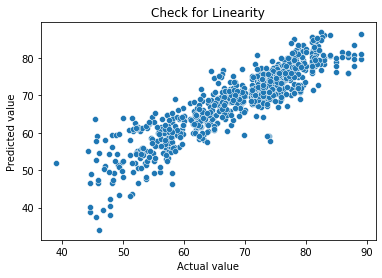

In [54]:
# Check for Linearity
sns.scatterplot(y_test['Life expectancy'],prediction)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

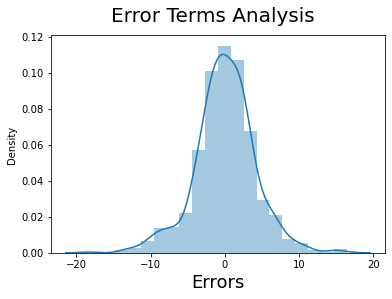

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test['Life expectancy'] - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)